In [193]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.6 kB/s 
     |████████████████████████████████| 511.7 MB 5.1 kB/s 
     |████████████████████████████████| 497.9 MB 18 kB/s 


In [194]:
import tensorflow as tf

In [195]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [196]:
ds = tfds.load('fashion_mnist',split='train')

In [197]:
ds.as_numpy_iterator().next()['label']

2

In [198]:
import numpy as np

In [199]:
detaiterator = ds.as_numpy_iterator()

In [200]:
detaiterator

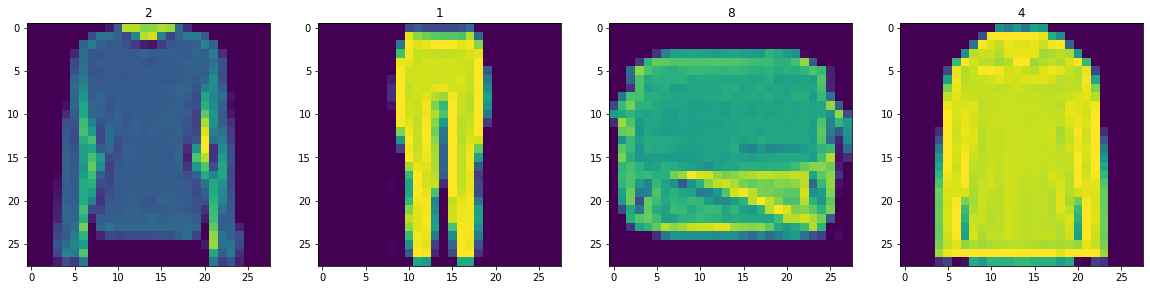

In [201]:
from urllib.request import DataHandler
fig , ax = plt.subplots(ncols=4 , figsize=(20,20))
for i in range(4):
  batch = detaiterator.next()
  ax[i].imshow(np.squeeze(batch['image']))
  ax[i].title.set_text(batch['label'])

In [202]:
def scale_images(data):
  image = data['image']
  return image / 255

In [203]:
ds = tfds.load('fashion_mnist' , split='train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [204]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# Neural Network


In [205]:
#import model components
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Flatten , Reshape , LeakyReLU , Dropout , UpSampling2D

In [206]:
def build_generator(): 
    model = Sequential()
    
    # Takes in random values and reshapes it to 7x7x128
    # Beginnings of a generated image
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    # Upsampling block 1 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Upsampling block 2 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Conv layer to get to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))
    
    return model

In [207]:
test_model = build_generator()
test_model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_90 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_18 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_33 (UpSamplin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_84 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_91 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                     

In [208]:
generator = build_generator()

In [209]:
generator.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_95 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_19 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_35 (UpSamplin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_89 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_96 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                     

In [210]:
img = generator.predict(np.random.rand(4,128,1))
img

array([[[[0.50238883],
         [0.504682  ],
         [0.506725  ],
         ...,
         [0.5013355 ],
         [0.5013062 ],
         [0.49949542]],

        [[0.5038798 ],
         [0.50341785],
         [0.49898317],
         ...,
         [0.5003505 ],
         [0.49886543],
         [0.4998273 ]],

        [[0.508156  ],
         [0.50560826],
         [0.505825  ],
         ...,
         [0.50254077],
         [0.5024074 ],
         [0.4989394 ]],

        ...,

        [[0.49726358],
         [0.49677935],
         [0.49758193],
         ...,
         [0.50003695],
         [0.50006646],
         [0.5003711 ]],

        [[0.50018555],
         [0.4980644 ],
         [0.5014733 ],
         ...,
         [0.4995418 ],
         [0.49921644],
         [0.49969053]],

        [[0.49887478],
         [0.4965579 ],
         [0.49866593],
         ...,
         [0.49774456],
         [0.49789864],
         [0.49869964]]],


       [[[0.50194234],
         [0.5028473 ],
         [0.50

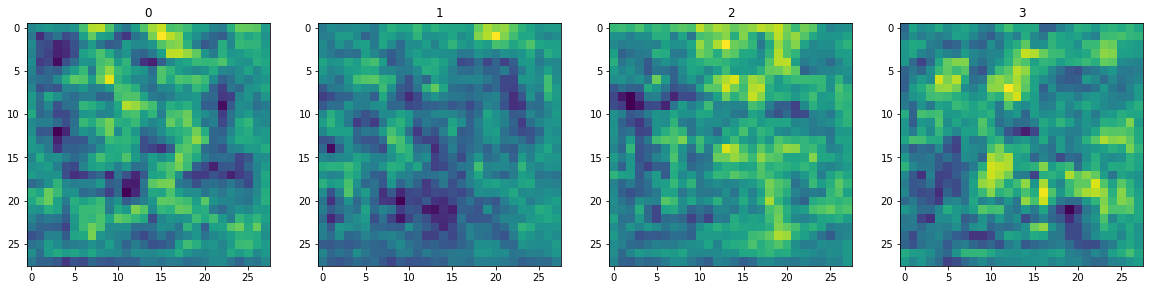

In [211]:
# Generate new fashion
img = generator.predict(np.random.randn(4,128,1))
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx, img in enumerate(img): 
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(idx)

In [212]:
img

array([[[0.49157852],
        [0.5016031 ],
        [0.49788007],
        [0.49900368],
        [0.50256044],
        [0.4981081 ],
        [0.5001345 ],
        [0.5017103 ],
        [0.499693  ],
        [0.4955113 ],
        [0.4942524 ],
        [0.5023443 ],
        [0.5063198 ],
        [0.50199443],
        [0.5023186 ],
        [0.5025001 ],
        [0.49034113],
        [0.4908205 ],
        [0.49576014],
        [0.49855483],
        [0.50379664],
        [0.50300837],
        [0.4999657 ],
        [0.50333434],
        [0.504216  ],
        [0.5027796 ],
        [0.5046549 ],
        [0.50195926]],

       [[0.4931234 ],
        [0.4981528 ],
        [0.4952035 ],
        [0.49705127],
        [0.4950899 ],
        [0.4963901 ],
        [0.50123125],
        [0.5006886 ],
        [0.4968988 ],
        [0.4931347 ],
        [0.49018022],
        [0.4950536 ],
        [0.4993263 ],
        [0.49553844],
        [0.5032041 ],
        [0.49715054],
        [0.4939931 ],
        

In [213]:
img.shape

(28, 28, 1)

In [214]:
#Discriminator
def build_discriminator(): 
    model = Sequential()
    
    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model 

In [215]:
discriminator = build_discriminator()

In [216]:
discriminator.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_100 (LeakyReLU)  (None, 24, 24, 32)       0         
                                                                 
 dropout_20 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_95 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_101 (LeakyReLU)  (None, 20, 20, 64)       0         
                                                                 
 dropout_21 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 conv2d_96 (Conv2D)          (None, 16, 16, 128)     

In [217]:
img = img[0]

In [218]:
img.shape

(28, 1)

In [219]:
img

array([[0.49157852],
       [0.5016031 ],
       [0.49788007],
       [0.49900368],
       [0.50256044],
       [0.4981081 ],
       [0.5001345 ],
       [0.5017103 ],
       [0.499693  ],
       [0.4955113 ],
       [0.4942524 ],
       [0.5023443 ],
       [0.5063198 ],
       [0.50199443],
       [0.5023186 ],
       [0.5025001 ],
       [0.49034113],
       [0.4908205 ],
       [0.49576014],
       [0.49855483],
       [0.50379664],
       [0.50300837],
       [0.4999657 ],
       [0.50333434],
       [0.504216  ],
       [0.5027796 ],
       [0.5046549 ],
       [0.50195926]], dtype=float32)

In [220]:
discriminator.predict(img)

ValueError: ignored